# Author: Jed MOUTAHIR
# Date: 2023-03-28
# Description: This is an attempt to create a machine learning model that can classify images of fruits.

In [26]:
import os
import random
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout


In [27]:
data_dir = 'webscraping/fruits/' # path to the directory containing all the fruit images
img_size = (100, 100)
batch_size = 32
epochs = 10

Enable GPU training with CUDA

In [28]:
physical_devices = tf.config.experimental.list_physical_devices('GPU')
if len(physical_devices) > 0:
    tf.config.experimental.set_memory_growth(physical_devices[0], True)

Define the ImageDataGenerator to preprocess and augment the image data

In [29]:
# Create the training and validation data generators using ImageDataGenerator with a large amount of data augmentation
datagen = ImageDataGenerator(rescale=1./255,
                             rotation_range=40,
                             width_shift_range=0.5,
                             height_shift_range=0.5,
                             shear_range=0.6,
                             zoom_range=0.6,
                             horizontal_flip=True,
                             fill_mode='nearest')

Use the flow_from_directory method to load the data from the directory

Found 2660 images belonging to 7 classes.


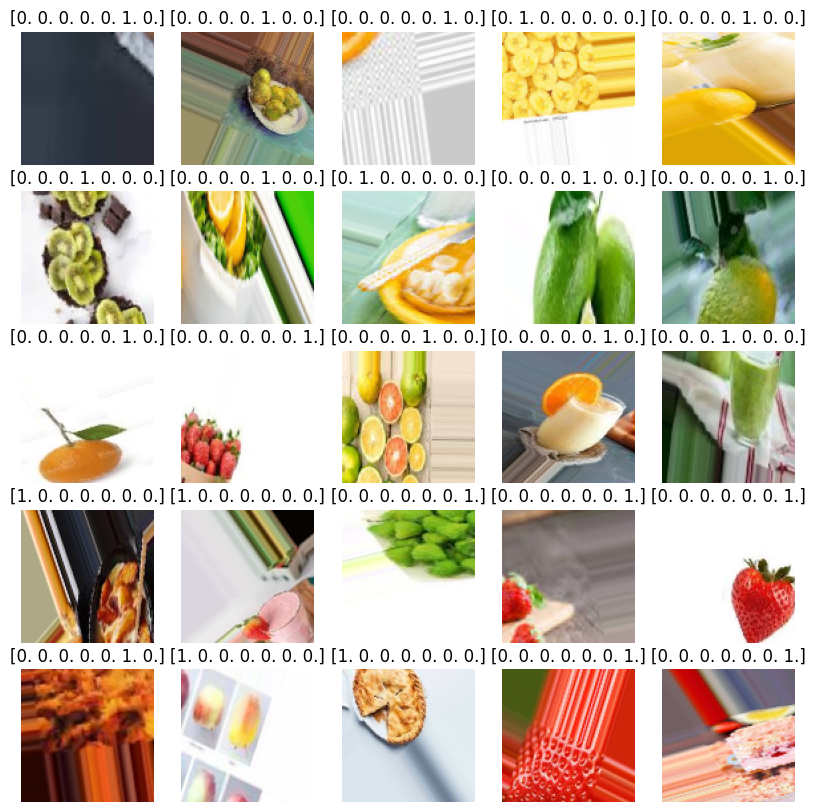

In [38]:
generator = datagen.flow_from_directory(data_dir,
                                        target_size=img_size,
                                        batch_size=batch_size,
                                        class_mode='categorical',
                                        shuffle=True)

# display the first 25 images from the training set
import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure(figsize=(10, 10))
for i in range(25):
    ax = fig.add_subplot(5, 5, i+1)
    ax.imshow(generator[0][0][i])
    ax.set_title(generator[0][1][i])
    ax.axis('off')


Define the architecture of the deep learning model

In [31]:
model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(img_size[0], img_size[1], 3)))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(generator.num_classes, activation='softmax'))

model.summary()


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 98, 98, 32)        896       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 49, 49, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 47, 47, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 23, 23, 64)       0         
 2D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 33856)             0         
                                                                 
 dense_6 (Dense)             (None, 128)              

Compile and train the model

In [32]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(generator,
                    epochs=epochs)

Epoch 1/10
84/84 [==============================] - 21s 236ms/step - loss: 1.9480 - accuracy: 0.2335
Epoch 2/10
84/84 [==============================] - 18s 219ms/step - loss: 1.8098 - accuracy: 0.2639
Epoch 3/10
84/84 [==============================] - 18s 219ms/step - loss: 1.7633 - accuracy: 0.2914
Epoch 4/10
84/84 [==============================] - 18s 219ms/step - loss: 1.7094 - accuracy: 0.3316
Epoch 5/10
84/84 [==============================] - 18s 218ms/step - loss: 1.6630 - accuracy: 0.3425
Epoch 6/10
84/84 [==============================] - 18s 219ms/step - loss: 1.6336 - accuracy: 0.3707
Epoch 7/10
84/84 [==============================] - 18s 219ms/step - loss: 1.5962 - accuracy: 0.3868
Epoch 8/10
84/84 [==============================] - 18s 218ms/step - loss: 1.5815 - accuracy: 0.3910
Epoch 9/10
84/84 [==============================] - 18s 218ms/step - loss: 1.6035 - accuracy: 0.3741
Epoch 10/10
84/84 [==============================] - 18s 218ms/step - loss: 1.5660 - accura

In [33]:
import pickle

# Assume that you have trained a machine learning model and stored it in a variable called 'model'

# Set the path and filename for the saved model
model_path = 'saved_models/'
model_filename = 'my_model_ws.pkl'

# Serialize and save the model to disk
with open(model_path + model_filename, 'wb') as file:
    pickle.dump(model, file)


In [34]:
import pickle

# Set the path and filename for the saved model
model_path = 'saved_models/'
model_filename = 'my_model_ws.pkl'

# Load the saved model from disk
with open(model_path + model_filename, 'rb') as file:
    model = pickle.load(file)
